## R labsession 7
Buriola Lorenzo - 2021860

In [1]:
#Function for sizing plots
fig <- function(width, heigth){
  options(repr.plot.width = width, repr.plot.height = heigth)
}

## Exercise 1

In [2]:
#Old test failure rate
p.old <- 0.15
#N° of patients
n <- 75

a) We can assume that the probability distribution of $y$ failures in $n$ samples follows a Binomial distribution

b) On a sample of $n = 75$ patient, the method fails in $\hat{y} = 6$ cases. Thus the best estimation in the frequentist approach (the one that pops out using the maximum likelihood estimation) is $p_{freq} = \frac{\hat{y}}{n}$ 

In [3]:
y <- 6
p.new.freq <- y/n
cat('p_freq =', p.new.freq)

p_freq = 0.08

c) Using a binomial _likelihood_ and assuming a _prior_ that follows a $Beta(\alpha, \beta)$ distribution, one can use the rules of conjugate priors. The _posterior_ will be as well a $Beta(\alpha', \beta')$ with:
* $\alpha' = \alpha + y$
* $\beta' = \beta+n-y$

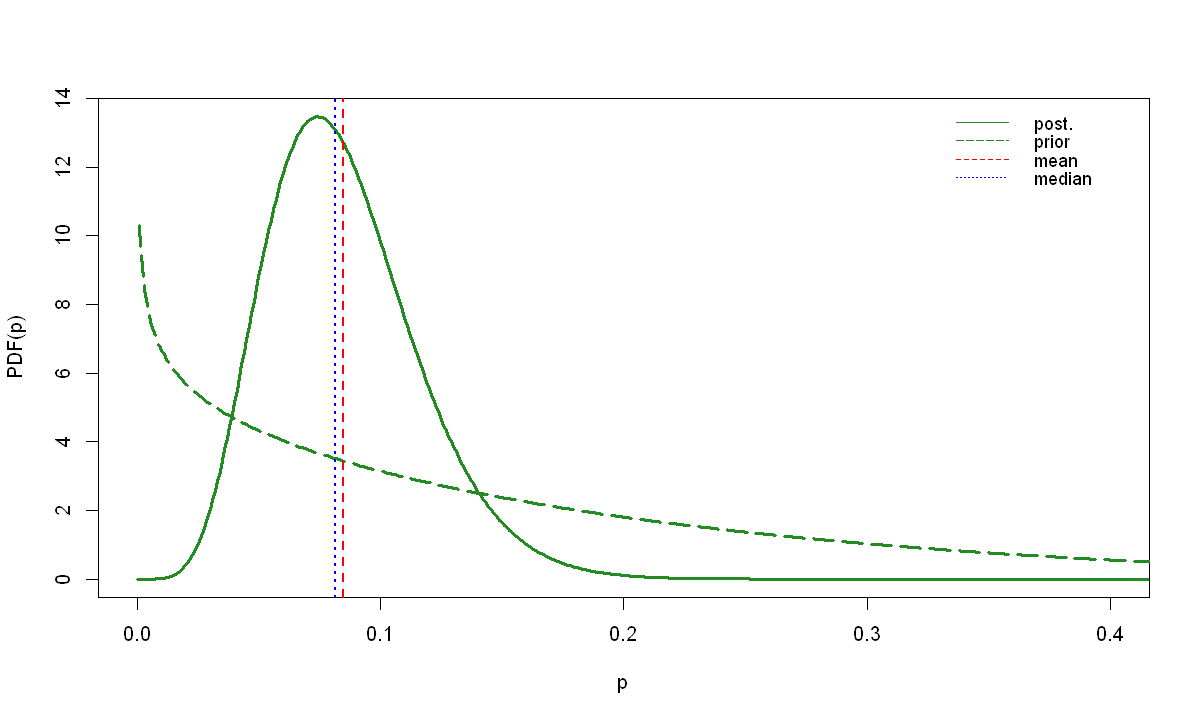

In [4]:
fig(10, 6)

#From mu, sigma to Beta's coefficient a and b
mu <- 0.15
sd <- 0.14
nu <- mu*(1-mu)/sd^2 - 1
a <- mu*nu
b <- (1-mu)*nu

p <- seq(0, 1, 0.001)
prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a+y, shape2 = b+n-y)

mean <- (a+y)/(a+b+n)
median <- qbeta(0.5, shape1 = a+y, shape2 = b+n-y)

plot(p, post, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)', xlim = c(0, 0.4))
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5,  lwd = 2.5)
abline(v = mean, col = 'red', lty = 2, lwd = 2)
abline(v = median, col = 'blue', lty = 3, lwd = 2)
legend('topright', inset = 0.01, legend = c('post.', 'prior', 'mean', 'median'), col=c("forestgreen", "forestgreen", 'red', 'blue'), lty=c(1,5,2,3), cex=0.9, box.lty = 0)

In [5]:
cat('mean =', mean, '\nmedian =', median)

mean = 0.08478674 
median = 0.08135575

As best estimation one can use also the mode of the posterior:

In [6]:
best <- (a+y-1)/(a+b+n-2)
cat('mode =', best)

mode = 0.07420875

d) Hypothesis test ($\alpha = 0.05$): 
* $H_0 : p \ge 0.15$
* $H_1 : p < 0.15$

(This is a one tailed hypothesis test)

In the Bayesian way it is sufficient to compute the integral under the _posterior_ from the value to test $P(p \ge 0.15 | y = 6)$ and check it with the significance level. 

Warning message:
"Removed 850 rows containing missing values (position_stack)."
Warning message:
"Removed 700 row(s) containing missing values (geom_path)."


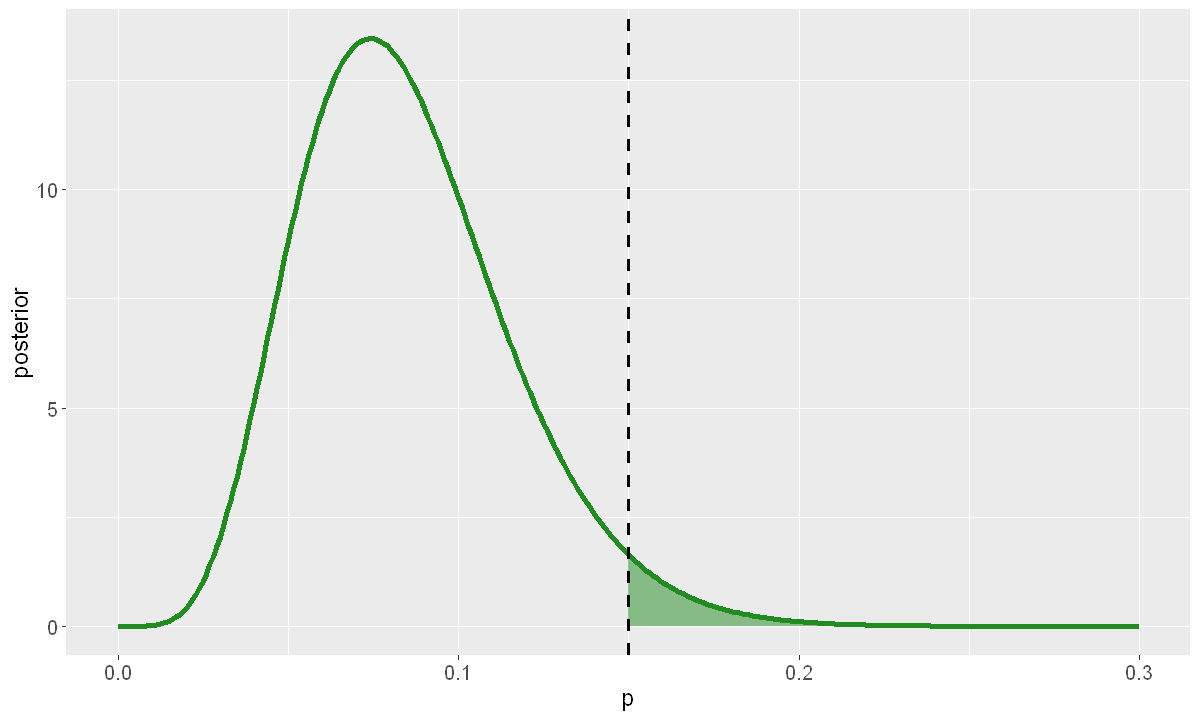

In [7]:
library(ggplot2)
fig(10, 6)
q <- ggplot(data.frame(p, post), aes(x = p, y = post))
q + geom_line(size = 1.5, color = 'forestgreen') + 
geom_area(aes(ifelse(p>= 0.15, p, NA)), fill = 'forestgreen', alpha = 0.5) + xlim(0, 0.3) +
ylab('posterior') +
geom_vline(xintercept = 0.15, col = 'black', size = 1, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

In [8]:
pv.bay <- 1 - pbeta(p.old, shape1 = a+y, shape2 = b+n-y)
cat('Bayesian p =', pv.bay)

Bayesian p = 0.03127933

$P(p \ge 0.15 | y = 6) < \alpha$, so we reject $H_0$ at this level of significance.
Notice where there is the cutoff value:

In [9]:
cat('cutoff value of p =', qbeta(0.95, shape1 = a+y, shape2 = b+n-y))

cutoff value of p = 0.140787

e) In the frequentist approach the cumulative of the binomial must be computed: $\sum_{y = 0}^{y = \hat{y}} Binom(y, n, p = 0.15)$. The result must be compared with the significance level

In [10]:
pv.freq <- pbinom(y, size = n, prob = 0.15)
cat('p-value =', pv.freq)

p-value = 0.0543533

Notice how the value is slightly bigger than the significance. Thus we cannot reject the null hypothesis. It is interesting to compute the cutoff value for $y$, in the frequentist approach:

In [11]:
cat('cutoff value of y =', qbinom(0.05, size = n, prob = 0.15))

cutoff value of y = 6

The cutoff value for $y$ is $6$, our measured value. For this level of significance this test is a borderline case. This is probabily one reason why the bayesian test and the frequentist give different results (The other is the existence of the _Prior_ in the Bayesian way).

In _R_ an exact binomial frequentist test is implemented. Let's check it:

In [12]:
binom.test(y, n, p = 0.15, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


Notice how the _p-value_ coincides with our calculation.

## Exercise 2

In [13]:
lambda <- seq(0, 5, 0.001)

y0 <- c(109, 144)
y1 <- c(65, 91)
y2 <- c(22, 32)
y3 <- c(3, 11)
y4 <- c(1, 2)

data <- data.frame(y0, y1, y2, y3, y4)
data

y0,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
109,65,22,3,1
144,91,32,11,2


In [14]:
Ns <- apply(data, 1, sum)
myfunc <- function(vec){
    vec[2]*1+vec[3]*2+vec[4]*3+vec[5]*4
}
SUMs <- apply(data, 1, myfunc)

a) Uniform prior: 
The rules of conjugate prior for poisson statistics are used. In particular the posterior will be a $Gamma(\alpha, \lambda)$ distribution where:
* $\alpha = \sum x_j + 1$
* $\lambda = n \;$ ($n$ = number of data)

n 1 observations: mean = 0.615 median = 0.6133341 var = 0.003075 
mode = 0.61 
95% credibility interval 0.5111251 - 0.7283408 
n 2 observations: mean = 0.7035714 median = 0.7023813 var = 0.002512755 
mode = 0.7 
95% credibility interval 0.6087487 - 0.805157 


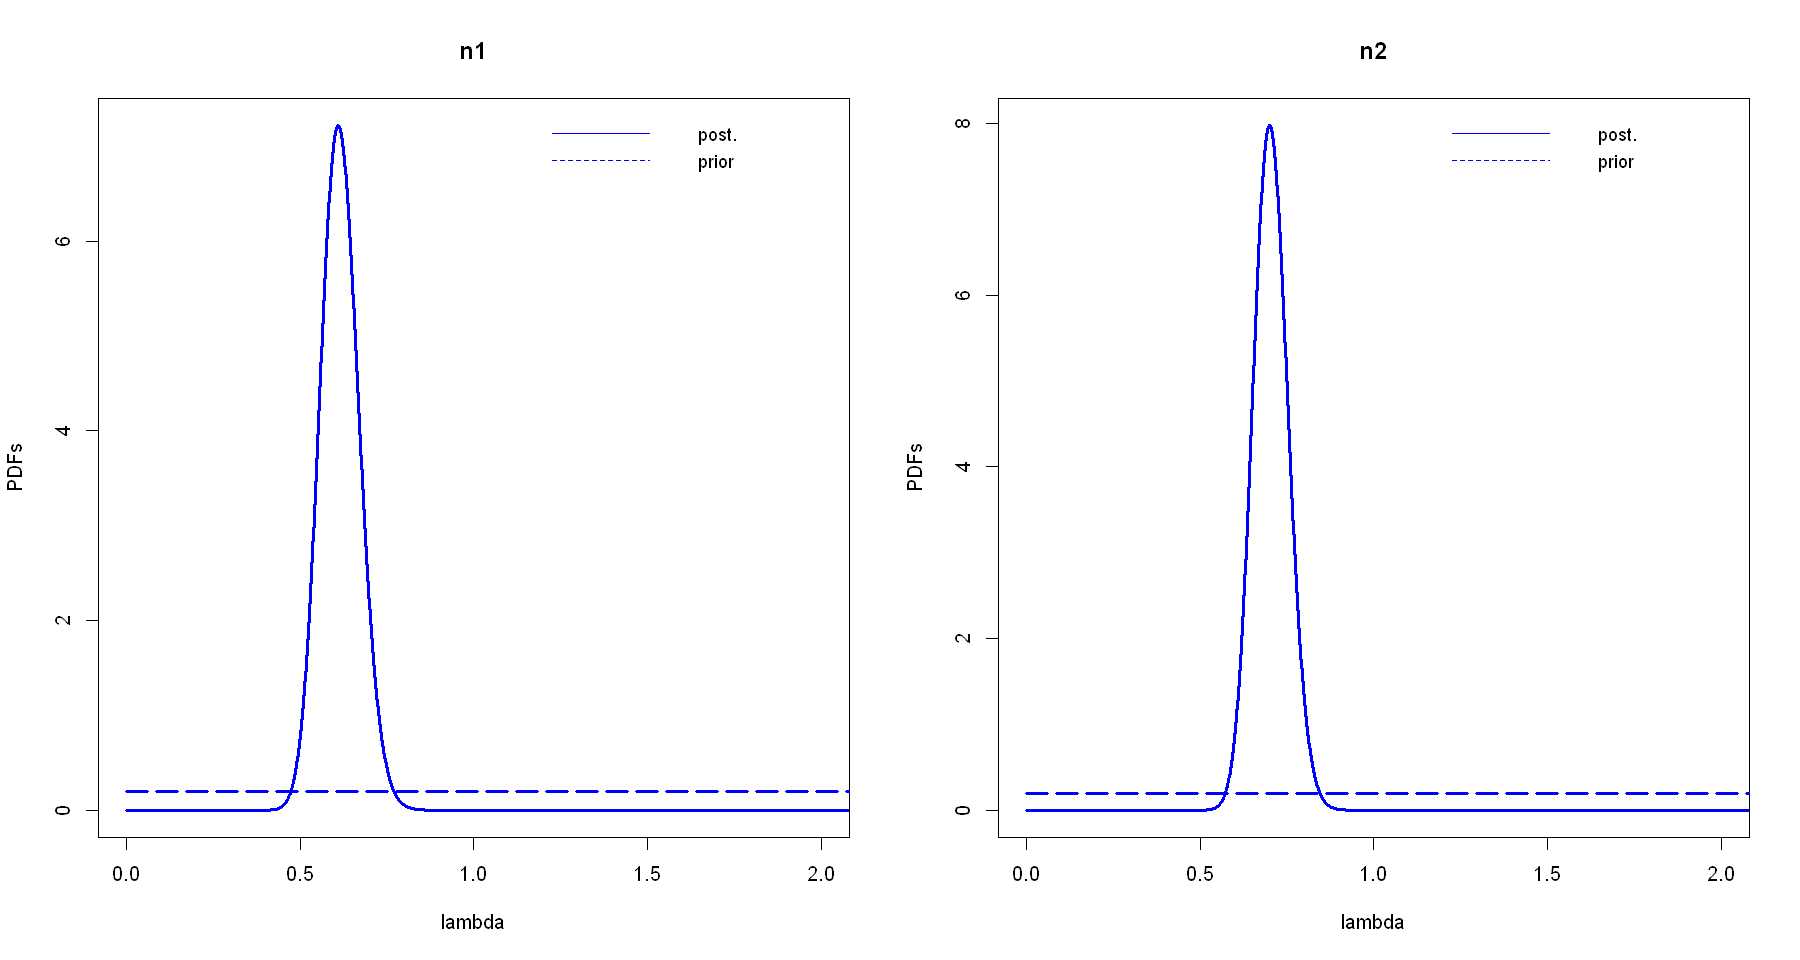

In [15]:
prior <- rep(1/max(lambda), length(lambda))
fig(15, 8)
means <- c()
vars <- c()
par(mfrow = c(1, 2))
for (i in 1:2){
    a <- SUMs[i] + 1
    l <- Ns[i]
    post <- dgamma(lambda, shape = a, rate = l)
    mode <- (a-1)/l
    mean <- a/l
    means <- append(means, mean)
    var <- a/l^2
    vars <- append(vars, var)
    median <- qgamma(0.5, shape = a, rate = l)
    ls <- qgamma(0.025, shape = a, rate = l)
    ld <- qgamma(0.975, shape = a, rate = l)
    cat('n', i, 'observations: mean =', mean, 'median =', median, 'var =', var, '\nmode =', mode, '\n')
    cat('95% credibility interval', ls, '-', ld, '\n')
    plot(lambda, post, type = 'l', lwd = 3, col = 'blue', ylab = 'PDFs', main = paste('n', as.character(i), sep = ''), xlim = c(0,2))
    lines(lambda, prior, lwd = 3, col = 'blue', lty = 5)
    legend('topright', inset = 0.01, legend = c('post.', 'prior'), col=c('blue', 'blue'), lty=1:5, cex=0.9, box.lty = 0)
} 

We want to compute the compatibility of these two measurements of the parameter $\lambda$ inferred from two datasets. Thanks to the high number of measures, we can approximate the final $Gamma$ distribution to a Gaussian and make an Hypohtesis test to compare the means (significance 5%):
* $H_0 : m_2-m_1 = 0$
* $H_1 : m_2-m_1 \neq 0$

In [16]:
#Posterior best estimation and 95% crediblity interval:
best <- means[2]-means[1]
level <- sqrt(vars[2]+vars[1])*qnorm(0.975)
cat('means difference:\n')
cat(best, '+/-', level, '= (', best-level,',', best+level,')')

means difference:
0.08857143 +/- 0.1465098 = ( -0.0579384 , 0.2350813 )

The value $0$ falls inside the credibility interval, we accept the null hypothesis.

b) Jeffrey's prior:
The rules of conjugate prior for poisson statistics are used. In particular the posterior will be a $Gamma(\alpha, \lambda)$ distribution where:
* $\alpha = \sum x_j + \frac{1}{2}$
* $\lambda = n \;$ ($n$ = number of data)

n 1 observations: mean = 0.6125 median = 0.6108341 var = 0.0030625 
mode = 0.6075 
95% credibility interval 0.5088464 - 0.7256196 
n 2 observations: mean = 0.7017857 median = 0.7005956 var = 0.002506378 
mode = 0.6982143 
95% credibility interval 0.6070878 - 0.8032465 


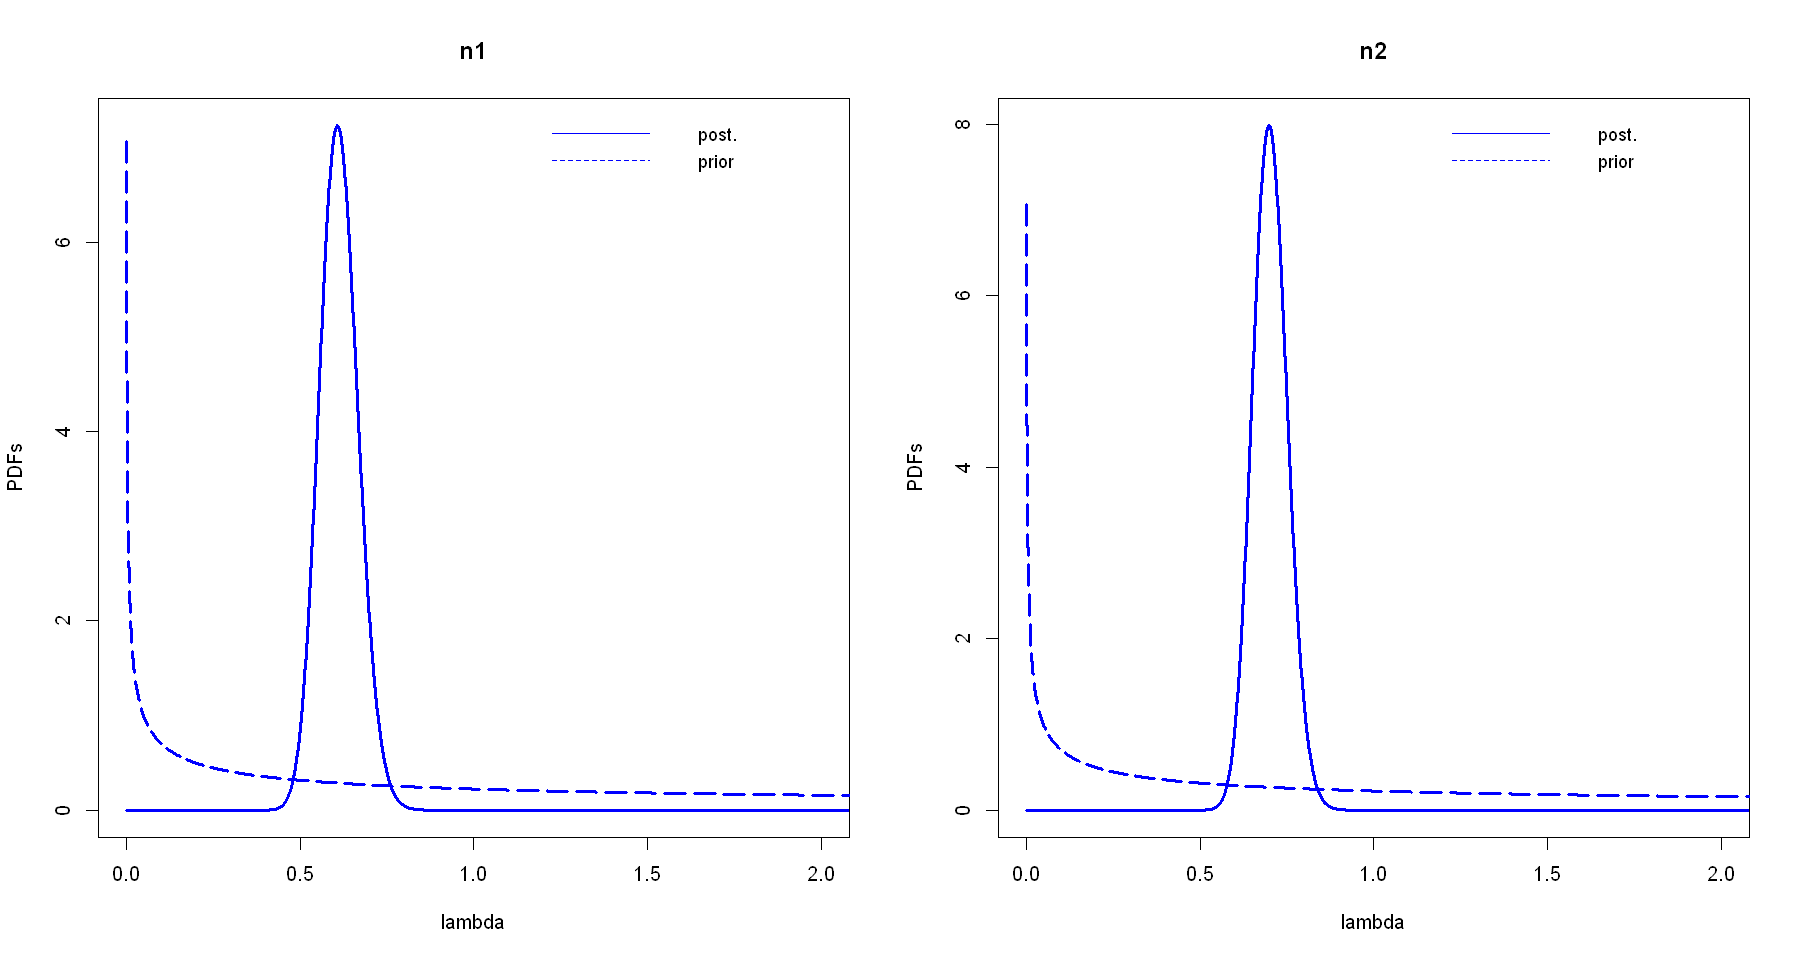

In [17]:
inv_sqrt <- function(x){
    1/sqrt(x)
}
prior <- inv_sqrt(lambda)/integrate(inv_sqrt, lower = 0, upper = 5)$value
means <- c()
vars <- c()
fig(15, 8)
par(mfrow = c(1, 2))
for (i in 1:2){
    a <- SUMs[i] + 0.5
    l <- Ns[i]
    post <- dgamma(lambda, shape = a, rate = l)
    mode <- (a-1)/l
    mean <- a/l
    means <- append(means, mean)
    var <- a/l^2
    vars <- append(vars, var)
    median <- qgamma(0.5, shape = a, rate = l)
    ls <- qgamma(0.025, shape = a, rate = l)
    ld <- qgamma(0.975, shape = a, rate = l)
    cat('n', i, 'observations: mean =', mean, 'median =', median, 'var =', var, '\nmode =', mode, '\n')
    cat('95% credibility interval', ls, '-', ld, '\n')
    plot(lambda, post, type = 'l', lwd = 3, col = 'blue', ylab = 'PDFs', main = paste('n', as.character(i), sep = ''), xlim = c(0,2))
    lines(lambda, prior, lwd = 3, col = 'blue', lty = 5)
    legend('topright', inset = 0.01, legend = c('post.', 'prior'), col=c('blue', 'blue'), lty=1:5, cex=0.9, box.lty = 0)
} 

Also in this case we can perform a hypothesis testat significance 5% (approximating the Gamma distr. to Gaussian ones) to check if the means are compatible:

In [18]:
#Posterior best estimation and 95% crediblity interval:
best <- means[2]-means[1]
level <- sqrt(vars[1]+vars[2])*qnorm(0.975)
cat('means difference:\n')
cat(best, '+/-', level, '= (', best-level,',', best+level,')')

means difference:
0.08928571 +/- 0.1462621 = ( -0.05697643 , 0.2355479 )

Also in this case the value $0$ falls inside the credibility interval so we can accept the null hypothesis.

## Exercise 3

### Old data

In [19]:
n <- 116
y <- 11

a) $p_{freq} = \frac{\hat{y}}{n}$ 

In [20]:
best.freq <- y/n
cat('frequentist estimator =', best.freq)

frequentist estimator = 0.09482759

b) Bayesian analysis using $Beta$ _prior_:

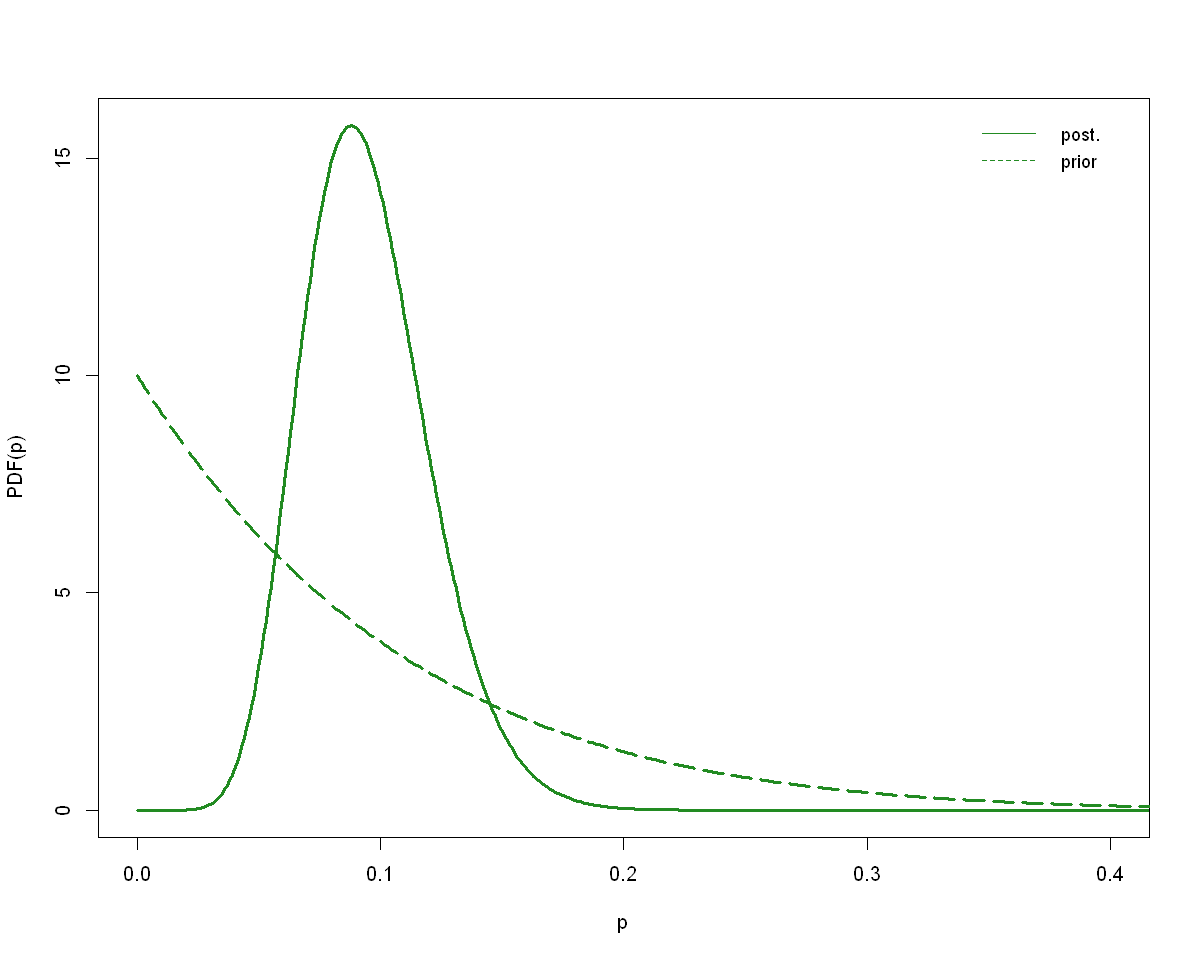

In [21]:
a <- 1
b <- 10

p <- seq(0, 1, 0.001)
prior <- dbeta(p, shape1 = a, shape2 = b)

a.o <- a+y
b.o <- b+n-y

post <- dbeta(p, shape1 = a.o, shape2 = b.o)

fig(10, 8)
plot(p, post, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)', xlim = c(0, 0.4))
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5,  lwd = 2.5)
legend('topright', inset = 0.01, legend = c('post.', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

c) The best estimator (mode), the mean and the variacne are computed using the properties of $Beta$ distributions.

In [22]:
best <- (a.o-1)/(a.o+b.o-2)
mean <- (a.o)/(a.o+b.o)
var <- (a.o*b.o)/(a.o+b.o)^2/(a.o+b.o+1)
ls <- qbeta(0.025, shape1 = a.o, shape2 = b.o)
ld <- qbeta(0.975, shape1 = a.o, shape2 = b.o)
cat('best estimator (mode) =', best, '\nmean =', mean, '\nvar =', var, 
    '\n95% credibility interval =', ls, '-', ld)

best estimator (mode) = 0.088 
mean = 0.09448819 
var = 0.0006684388 
95% credibility interval = 0.05018522 - 0.1508379

d) Hypothesis test ($\alpha = 0.05$)
* $H_0 : p= 0.1$
* $H1 : p \neq 0.1$

(this is a two tailed test)

For the frequentist approach we can computed the _p-value_: Since this is a two tailed test, given the value to test $\hat{y}$ we can compute $\sum_{y \in I} Binom(y, n, p = 0.1)$ (where $I = \{i:P(y=i) \le P(y=\hat{y})\}$ is the ensamble of $y$ values in the two tails with probability less than $\hat{y}$) and compare it with $\alpha$. 

In this first case we will compute only the cumulative of one tail:

In [23]:
p.freq <- pbinom(q = y, size = n, prob = 0.1)
cat('left tail cumulative =', p.freq)

left tail cumulative = 0.5043125

In [24]:
#median
qbinom(0.5, size = n, prob = 0.1)

[1] 11

It is improper to look at one tail, but in this case it is clear that the measurement fall way inside of the confidence level is way over the significance, 11 is the median of the distribution: we cannot reject the null hypothesis. Performing the exact test we obtain a _p-value_ of 1

In [25]:
binom.test(y, n, p = 0.1, alternative = 't')


	Exact binomial test

data:  y and n
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


The value $\hat{y}$ is inside the accepted region.

In the case of Bayesian test we already know the results looking at the 95% credibility interval limits. They contains the value $0.1$, so the the null hypothesis will not be rejected. Anyway, computing the area under the pdf it is way bigger than $\frac{\alpha}{2}$:

In [26]:
#Bayesian
pv.bay <- 1 - pbeta(0.1, shape1 = a.o, shape2 = b.o)
cat('Bayesian p =', pv.bay)

Bayesian p = 0.385815

Warning message:
"Removed 800 rows containing missing values (position_stack)."
Warning message:
"Removed 700 row(s) containing missing values (geom_path)."


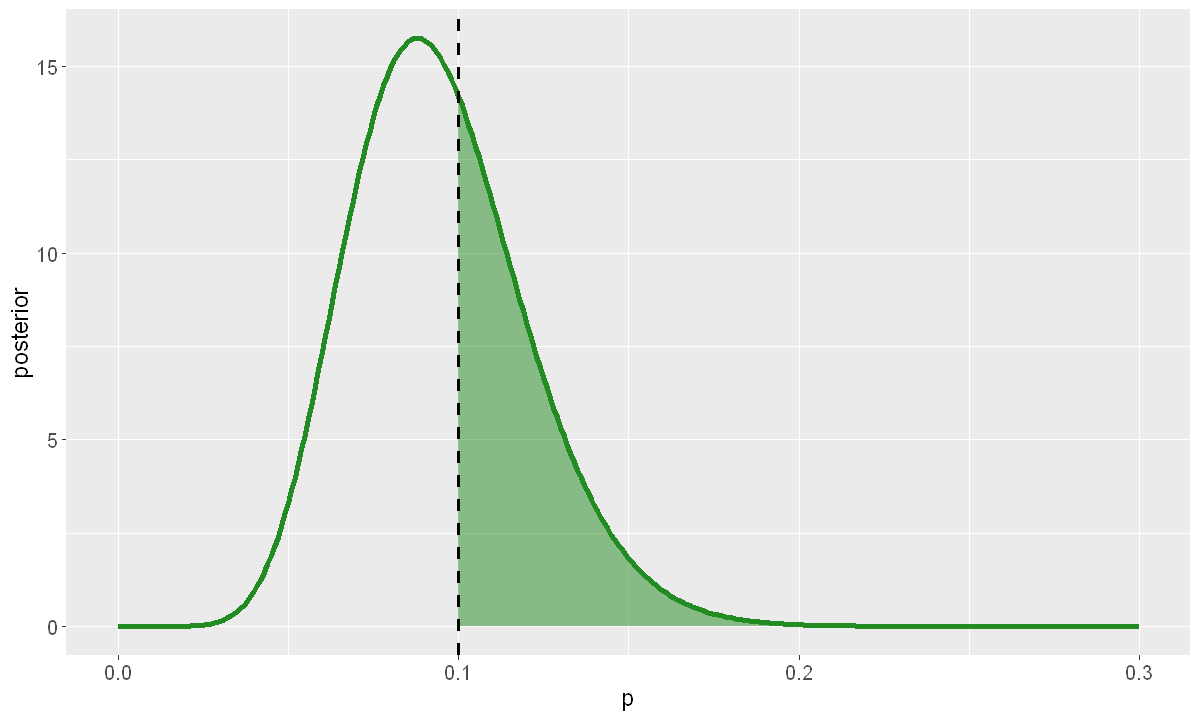

In [27]:
fig(10, 6)
q <- ggplot(data.frame(p, post), aes(x = p, y = post))
q + geom_line(size = 1.5, color = 'forestgreen') + 
geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5) + xlim(0, 0.3) +
ylab('posterior') +
geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

### New data

In [28]:
n <- 165
y <- 9

e) $p_{freq} = \frac{\hat{y}}{n}$ 

In [29]:
best.freq <- y/n
best.freq

[1] 0.05454545

f) Bayesian analysis:
* $Beta(1,10)$ _prior_

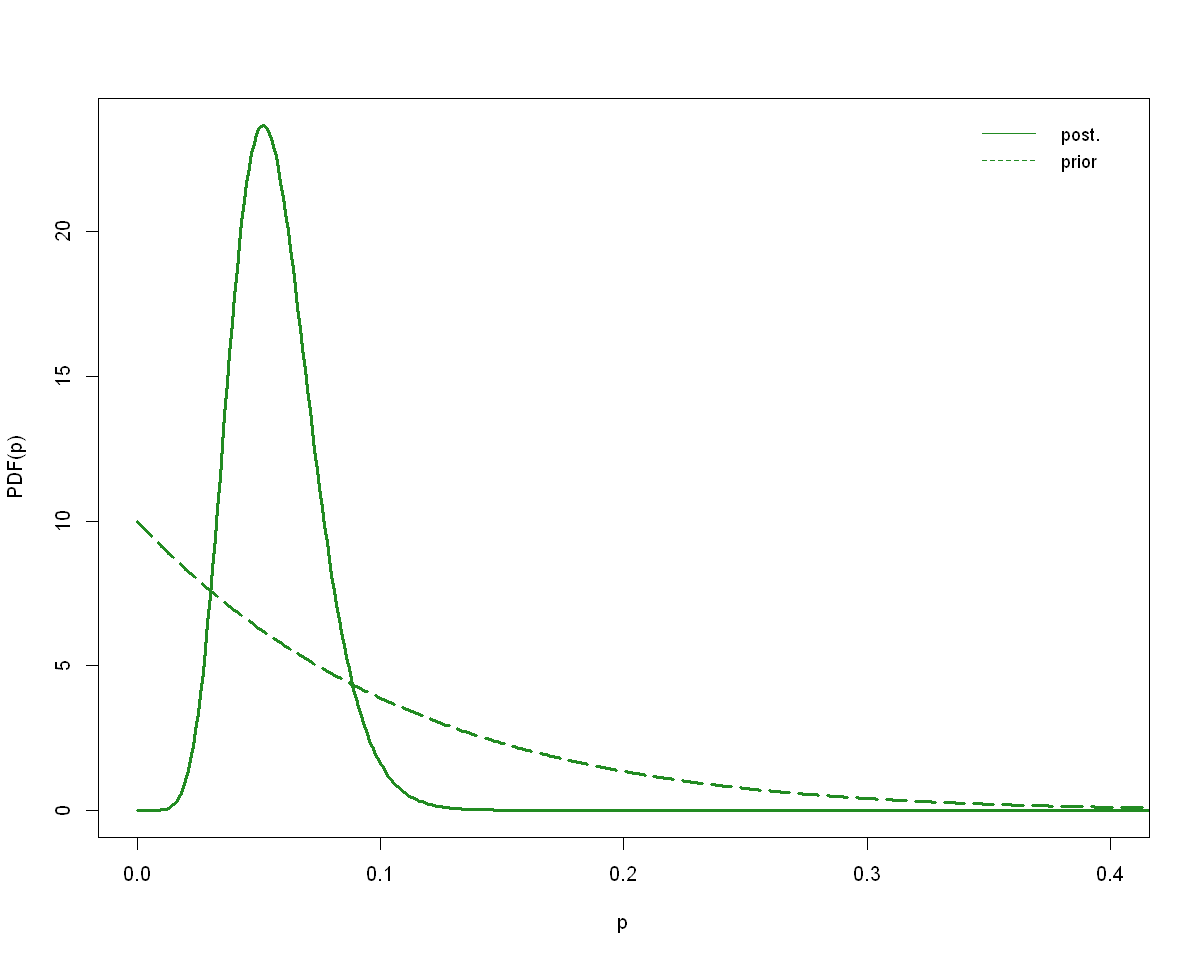

In [30]:
a <- 1
b <- 10

p <- seq(0, 1, 0.001)
prior <- dbeta(p, shape1 = a, shape2 = b)

a_n <- a+y
b_n <- b+n-y

post1 <- dbeta(p, shape1 = a_n, shape2 = b_n)

fig(10, 8)
plot(p, post1, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)', xlim = c(0, 0.4))
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5,  lwd = 2.5)
legend('topright', inset = 0.01, legend = c('post.', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

* Old measurement _prior_ ($Beta$ distribution as well)

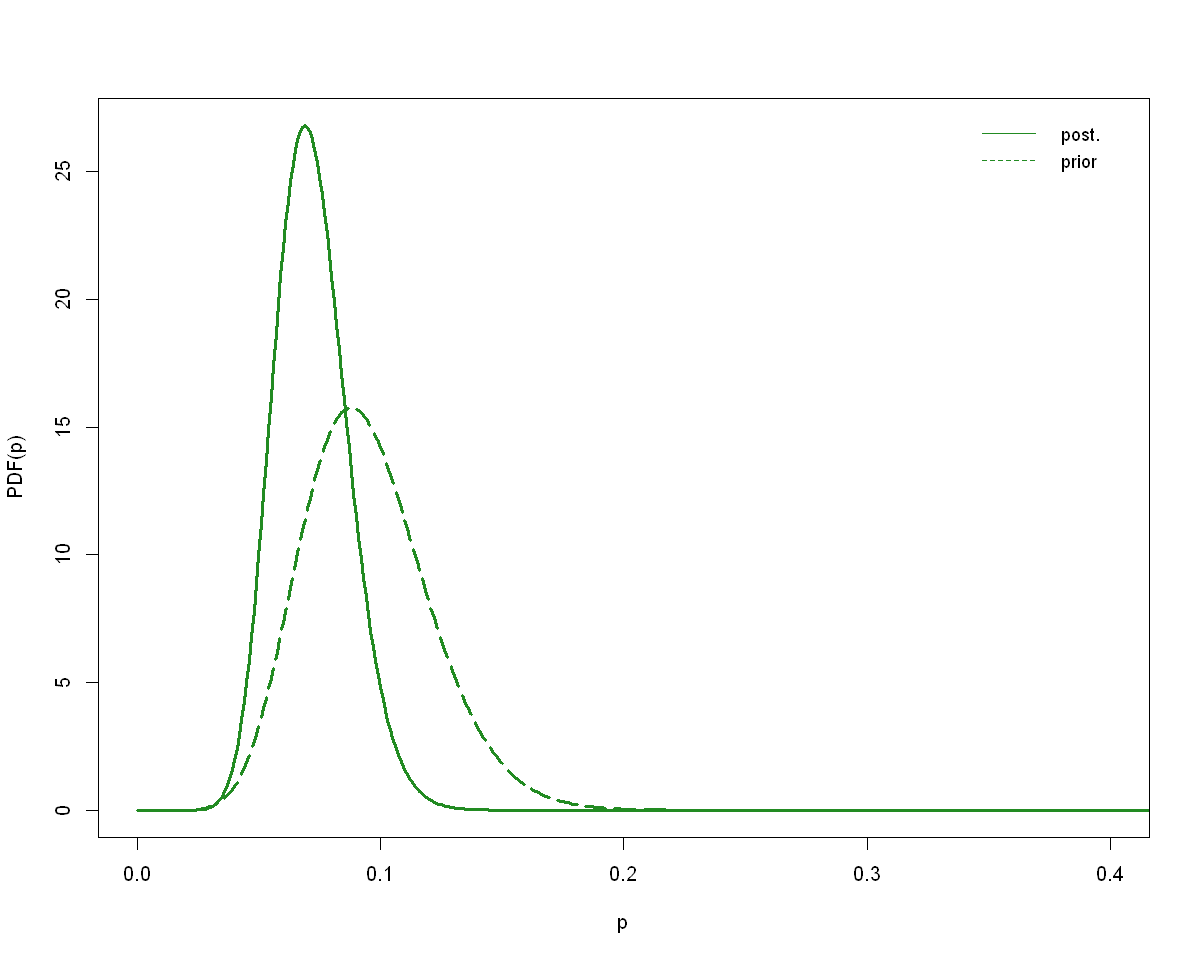

In [31]:
p <- seq(0, 1, 0.001)
prior <- dbeta(p, shape1 = a.o, shape2 = b.o)

a.f <- a.o+y
b.f <- b.o+n-y

post2 <- dbeta(p, shape1 = a.f, shape2 = b.f)

fig(10, 8)
plot(p, post2, type = 'l', col = 'forestgreen', lwd = 2.5, ylab = 'PDF(p)', xlim = c(0, 0.4))
lines(p, prior, type = 'l', col = 'forestgreen', lty = 5,  lwd = 2.5)
legend('topright', inset = 0.01, legend = c('post.', 'prior'), col=c("forestgreen", "forestgreen"), lty=1:5, cex=0.9, box.lty = 0)

g) Bayesian estimators 
* $Beta(1,10)$ _prior_

In [32]:
best <- (a_n-1)/(a_n+b_n-2)
mean <- (a_n)/(a_n+b_n)
var <- (a_n*b_n)/(a_n+b_n)^2/(a_n+b_n+1)
ls <- qbeta(0.025, shape1 = a_n, shape2 = b_n)
ld <- qbeta(0.975, shape1 = a_n, shape2 = b_n)
cat('best estimator (mode) =', best, '\nmean =', mean, '\nvar =', var, 
    '\n95% credibility interval =', ls, '-', ld)

best estimator (mode) = 0.05172414 
mean = 0.05681818 
var = 0.0003027677 
95% credibility interval = 0.02773918 - 0.09538012

* Old measurement _prior_ ($Beta$ distribution as well)

In [33]:
best <- (a.f-1)/(a.f+b.f-2)
mean <- (a.f)/(a.f+b.f)
var <- (a.f*b.f)/(a.f+b.f)^2/(a.f+b.f+1)
ls <- qbeta(0.025, shape1 = a.f, shape2 = b.f)
ld <- qbeta(0.975, shape1 = a.f, shape2 = b.f)
cat('best estimator (mode) =', best, '\nmean =', mean, '\nvar =', var, 
    '\n95% credibility interval =', ls, '-', ld)

best estimator (mode) = 0.06896552 
mean = 0.07191781 
var = 0.0002278008 
95% credibility interval = 0.04522356 - 0.1041519

d) Hypothesis test ($\alpha = 0.05$)
* $H_0 : p= 0.1$
* $H1 : p \neq 0.1$

(this is a two tailed test)

For the frequentist approach we can computed the _p-value_, as explained before, and compare it with $\alpha$.

In [34]:
binom_two_tailed <- function(y){
    pvalue <- pbinom(y, size = n, prob = 0.1)
    i <- y*5
    pcut <- dbinom(y, size = n, prob = 0.1)
    while(dbinom(i, size = n, prob = 0.1) < pcut){
        i <- i-1
    }
    pvalue <- pvalue + 1 - pbinom(i, size = n, prob = 0.1)
    pvalue
}
p_v <- binom_two_tailed(9)
cat('frequentist p_value =', p_v)

frequentist p_value = 0.0511155

In [35]:
binom.test(y, n, p = 0.1, alternative = 't')


	Exact binomial test

data:  y and n
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


Notice that the _p-value_ is slightly greater than $\alpha$, we cannot reject the null hypothesis. Also there is a borderline case. Computing the 2.5% percentile of distribution we have that it coincides with $\hat{y}$.

In [36]:
#2.5 percentile
qbinom(0.025, size = n, prob = 0.1)

[1] 9

In the case of Bayesian test on the two posterior computed we already know the results looking at the 95% credibility interval limits. 
* The first interval ($Beta(1, 10)$) does not contain the value $0.1$, so the the null hypothesis will be rejected.
* The second interval (old measurement prior) does contain the value $0.1$, so the the null hypothesis will NOT be rejected.

Warning message:
"Removed 900 rows containing missing values (position_stack)."
Warning message:
"Removed 800 row(s) containing missing values (geom_path)."


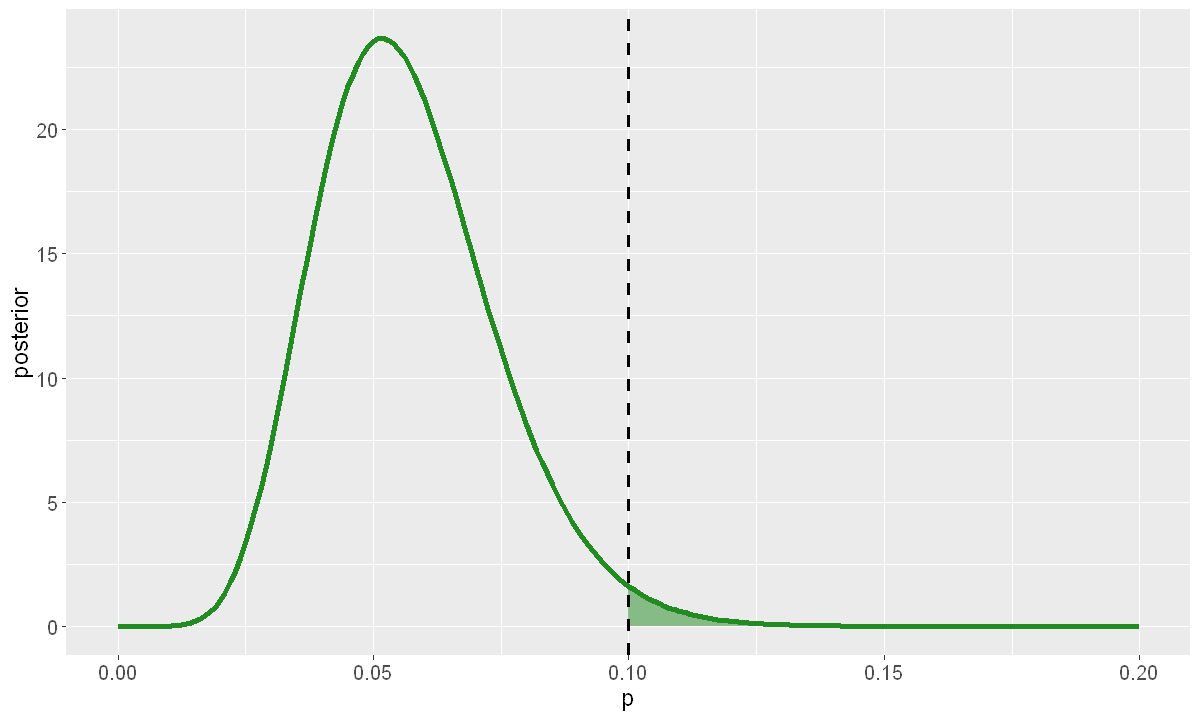

In [37]:
fig(10, 6)
q <- ggplot(data.frame(p, post1), aes(x = p, y = post1))
q + geom_line(size = 1.5, color = 'forestgreen') + 
geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5) + xlim(0, 0.2) +
ylab('posterior') +
geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

In [38]:
#Bayesian1
pv.bay <- 1 - pbeta(0.1, shape1 = a_n, shape2 = b_n)
cat('Bayesian p =', pv.bay)

Bayesian p = 0.01574077

Warning message:
"Removed 900 rows containing missing values (position_stack)."
Warning message:
"Removed 800 row(s) containing missing values (geom_path)."


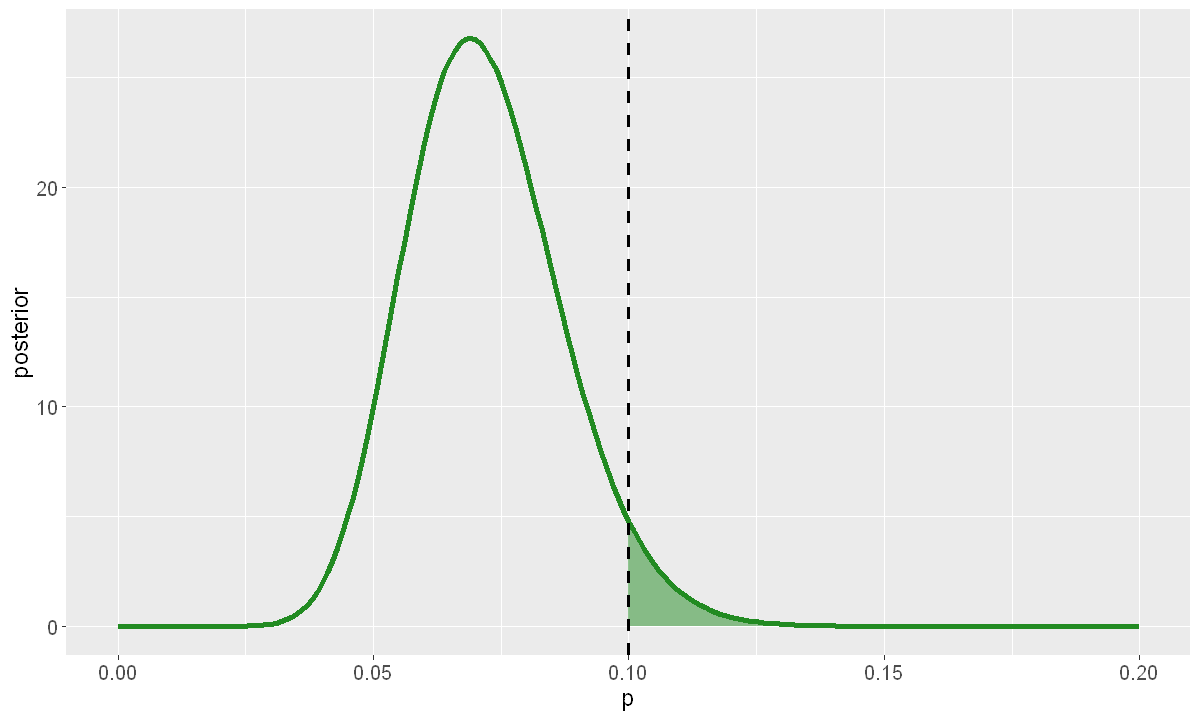

In [39]:
fig(10, 6)
q <- ggplot(data.frame(p, post2), aes(x = p, y = post2))
q + geom_line(size = 1.5, color = 'forestgreen') + 
geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5) + xlim(0, 0.2) +
ylab('posterior') +
geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed') +
theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))

In [40]:
#Bayesian2
pv.bay <- 1-pbeta(0.1, shape1 = a.f, shape2 = b.f)
cat('Bayesian p =', pv.bay)

Bayesian p = 0.04117008

The probabilities computed confirm what we have said. 